In [2]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy.io import mmread
import muon as mu
import seaborn as sns

import celloracle as co
co.__version__

%matplotlib inline

In [ ]:
#bed = pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/processed/cellranger/filtered_peak_bc_matrix/peaks.bed.gz", sep="\t", header=None)
#bed.columns = ["chr", "start", "end"]
#features = bed["chr"] + ":" + bed["start"].astype(str) + "-" + bed["end"].astype(str)
#features.to_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/processed/cellranger/filtered_peak_bc_matrix/features.tsv.gz", sep="\t", header=False, index=False, compression="gzip")

In [4]:
# Read mtx
mtx = mmread("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/processed/cellranger/filtered_peak_bc_matrix/matrix.mtx.gz")
mtx.shape

(87249, 5380)

In [8]:
# Read barcodes and peaks
barcodes = pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/processed/cellranger/filtered_peak_bc_matrix/barcodes.tsv.gz", sep="\t", header=None, index_col=0)
peaks = pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/processed/cellranger/filtered_peak_bc_matrix/features.tsv.gz", sep="\t", header=None, index_col=0)
barcodes.index.name = None
peaks.index.name = None

In [6]:
# Binarize the matrix
mtx.data = np.ones_like(mtx.data)

In [9]:
# Make AnnData object
atac = ad.AnnData(X=mtx.T.tocsr(), obs=barcodes, var=peaks)
atac

AnnData object with n_obs × n_vars = 5380 × 87249

In [11]:
# Ensure there are no peaks included with zero reads
atac = atac[atac.X.sum(axis=1) > 0, :].copy()
atac

AnnData object with n_obs × n_vars = 5380 × 87249

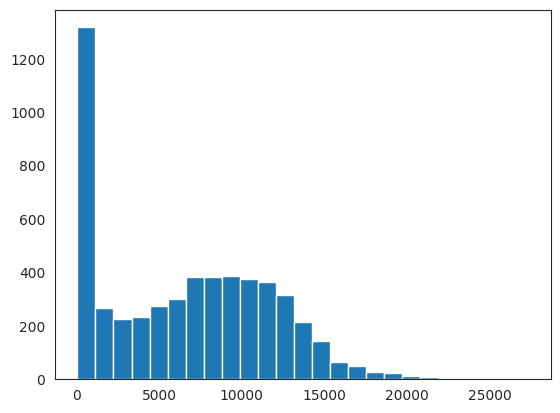

In [12]:
# Visualize peak_count_per_cell
plt.hist(atac.X.sum(axis=1), bins=25);

In [13]:
# Filter cells by peak count
max_count = 15000
min_count = 2000
sc.pp.filter_cells(atac, min_counts=min_count)
sc.pp.filter_cells(atac, max_counts=max_count)
atac

AnnData object with n_obs × n_vars = 3609 × 87249
    obs: 'n_counts'

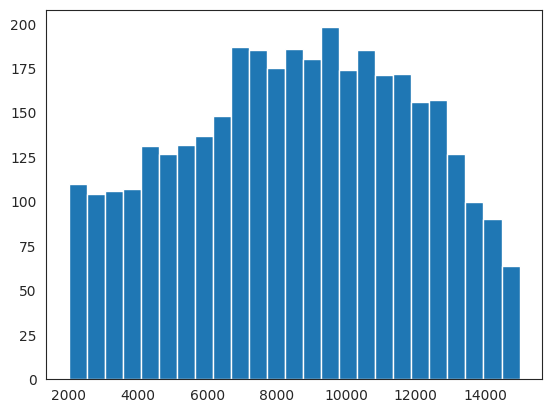

In [14]:
# Visualize peak_count_per_cell
plt.hist(atac.X.sum(axis=1), bins=25);

In [15]:
atac.layers["counts"] = atac.X.copy()

In [16]:
mdata = mu.MuData(
    {"atac": atac}
)

In [17]:
mdata

MuData object with n_obs × n_vars = 3609 × 87249
  1 modality
    atac:	3609 x 87249
      obs:	'n_counts'
      layers:	'counts'

In [18]:
mdata.write("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/mdata.h5mu")

In [20]:
mu.read_h5mu("/cellar/users/aklie/data/datasets/neurips2021_small/small.h5mu").mod["atac"].var.index.name

# DONE!

---